In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# Load the .mat file
with h5py.File('pressure_data.mat', 'r') as file:
    X_data = np.array(file['X_data'])
    Z_data = np.array(file['Z_data'])
    p1 = np.array(file['p1'])

# Flatten the arrays if necessary
X_data = X_data.flatten()
Z_data = Z_data.flatten()
p1 = p1.flatten()

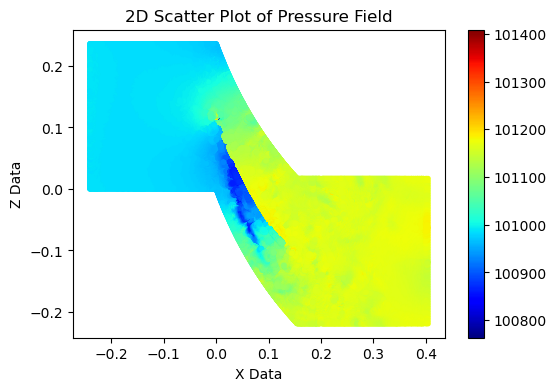

In [3]:
# Create a 2D scatter plot
plt.figure(figsize=(6, 4))  # Set the figure size to 10 by 6 inches
plt.scatter(X_data, Z_data, c=p1, s=15, cmap='jet', edgecolor='none')  # s is for size, c is for color
plt.colorbar()  # Show the color scale
plt.title('2D Scatter Plot of Pressure Field')
plt.xlabel('X Data')
plt.ylabel('Z Data')
plt.clim(np.min(p1), np.max(p1))  # Adjust the color range to match p1's range

plt.show()

In [ ]:
# # Plot the figures together

# # Load Koopman mode decomposition results
# resDMD_data = loadmat('turbulence_resdmd_150basis.mat')
# kpm_modes = resDMD_data['kpm_modes']  # Koopman modes
# evalues = resDMD_data['evalues'].flatten()  # Eigenvalues
# Psi_X = resDMD_data['Psi_X']  # Psi_X matrix
# Psi_Y = resDMD_data['Psi_Y']  # Psi_Y matrix

# # Calculate residues for each mode
# residues = np.zeros(evalues.shape)
# for i in range(len(evalues)):
#     psi_x_i = Psi_X[:, i]
#     psi_y_i = Psi_Y[:, i]
#     lambda_i = evalues[i]
#     res_i = np.linalg.norm(psi_y_i - lambda_i * psi_x_i) / np.linalg.norm(psi_x_i)
#     residues[i] = res_i

# # Indices of the 10 modes with the smallest residues
# selected_indices = np.argsort(residues)[:6]

# # Number of columns for the subplot
# ncols = 2
# # Calculate the number of rows needed for 10 figures, with 2 figures per row
# nrows = (len(selected_indices) + ncols - 1) // ncols

# # Set up the subplot grid
# fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 6))  # Adjust figsize accordingly

# # Flatten the axs array for easy iteration in case of multiple rows
# axs = axs.flatten()

# from matplotlib.colors import Normalize
# for i, index in enumerate(selected_indices):
#     mode = np.real(kpm_modes[:, index])  # Extract real part of the Koopman mode
#     mode_reshaped = mode.reshape(X_data.shape)  # Reshape mode to fit spatial grid dimensions
#     residue_value = residues[index]  # Get the residue value for the current mode
    
#     # Create a scatter plot with increased point size for better visibility
#     im = axs[i].scatter(X_data.flatten(), Z_data.flatten(), c=mode_reshaped.flatten(), s=35, cmap='jet', edgecolor='none')
#     axs[i].set_title(f'Koopman Mode {index + 1} (Residue: {residue_value:.2e})')
#     axs[i].set_xlabel('X Data')
#     axs[i].set_ylabel('Z Data')
    
#     # Set color limits for the scatter plot based on the 10th to 90th percentile
#     lower_lim = np.percentile(mode_reshaped.flatten(), 10)
#     upper_lim = np.percentile(mode_reshaped.flatten(), 90)
#     im.set_clim(lower_lim, upper_lim)
    
#     # Create an axis for the colorbar
#     fig.colorbar(im, ax=axs[i])   

# # Hide any unused subplots
# for ax in axs[len(selected_indices):]:
#     ax.set_visible(False)

# # Adjust layout for better spacing
# plt.tight_layout()
# # plt.show()





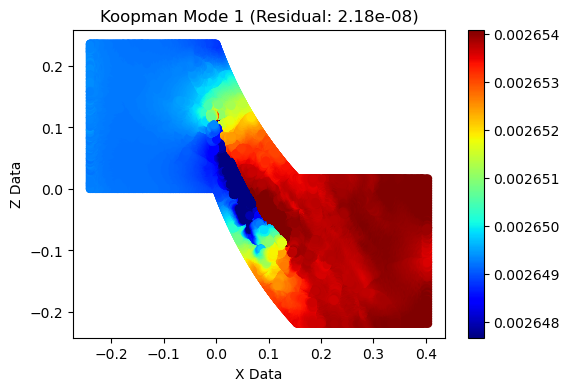

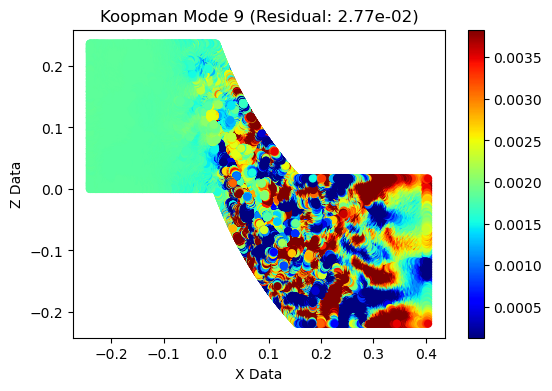

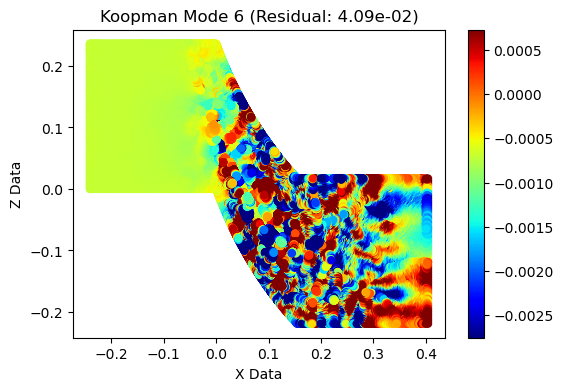

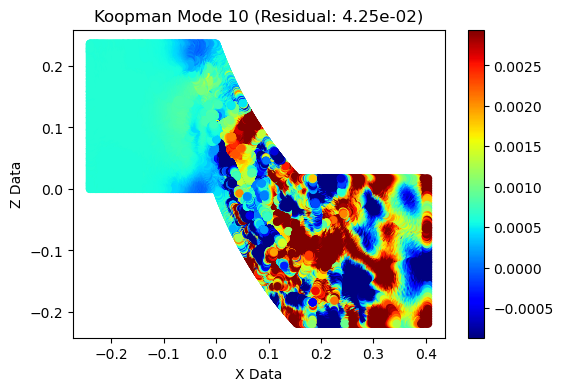

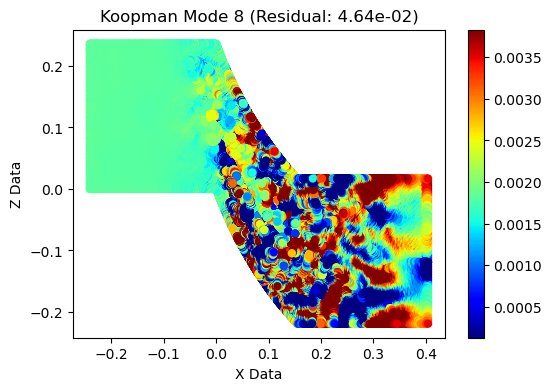

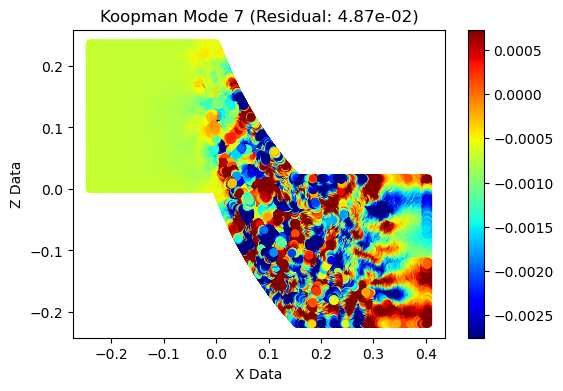

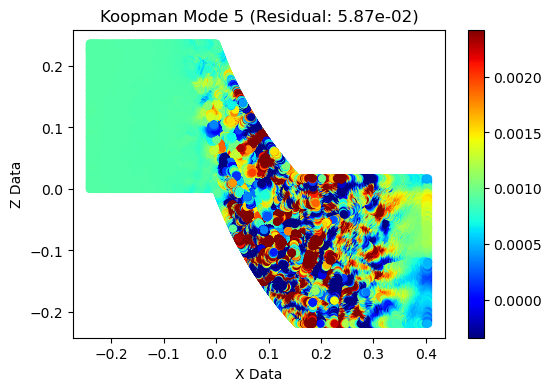

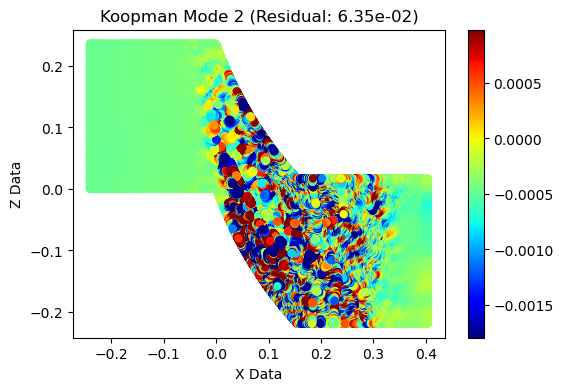

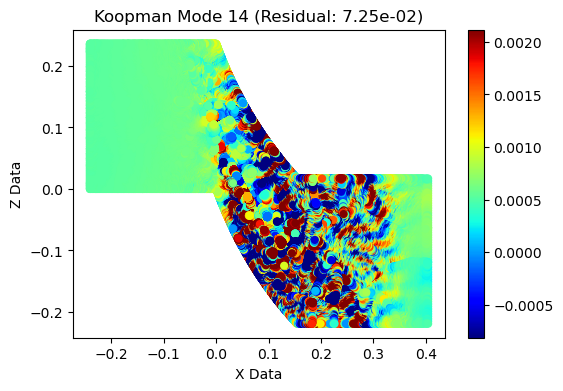

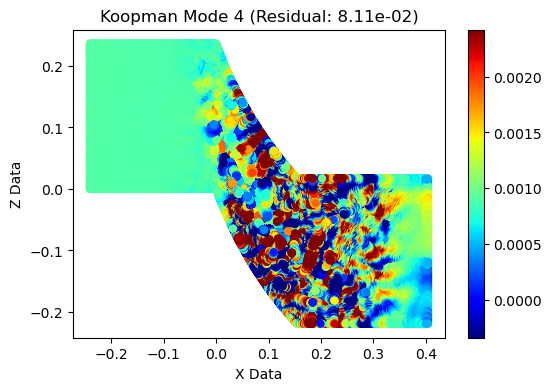

In [4]:
# Plot the figures separately
from scipy.io import loadmat

# Load Koopman mode decomposition results
resDMD_data = loadmat('turbulence_resdmd_300basis.mat')
kpm_modes = resDMD_data['kpm_modes']  # Koopman modes
evalues = resDMD_data['evalues'].flatten()  # Eigenvalues
Psi_X = resDMD_data['Psi_X']  # Psi_X matrix
Psi_Y = resDMD_data['Psi_Y']  # Psi_Y matrix

# Calculate residues for each mode
residues = np.zeros(evalues.shape)
for i in range(len(evalues)):
    psi_x_i = Psi_X[:, i]
    psi_y_i = Psi_Y[:, i]
    lambda_i = evalues[i]
    res_i = np.linalg.norm(psi_y_i - lambda_i * psi_x_i) / np.linalg.norm(psi_x_i)
    residues[i] = res_i

# Indices of the 10 modes with the smallest residues
selected_indices = np.argsort(residues)[:10]

# Iterate over selected indices and plot each Koopman mode separately
for index in selected_indices:
    # Create a new figure for each Koopman mode
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Extract real part of the Koopman mode and reshape it to fit spatial grid dimensions
    mode = np.real(kpm_modes[:, index])
    mode_reshaped = mode.reshape(X_data.shape)
    
    # Get the residue value for the current mode
    residue_value = residues[index]
    
    # Create a scatter plot with increased point size for better visibility
    im = ax.scatter(X_data.flatten(), Z_data.flatten(), c=mode_reshaped.flatten(), s=35, cmap='jet', edgecolor='none')
    
    # Set title, labels, and color limits for the scatter plot
    ax.set_title(f'Koopman Mode {index + 1} (Residual: {residue_value:.2e})')
    ax.set_xlabel('X Data')
    ax.set_ylabel('Z Data')
    lower_lim = np.percentile(mode_reshaped.flatten(), 10)
    upper_lim = np.percentile(mode_reshaped.flatten(), 90)
    im.set_clim(lower_lim, upper_lim)
    
    # Create a colorbar for the scatter plot
    fig.colorbar(im, ax=ax)
    
    # Save the figure with a filename indicating the index of the Koopman mode
    fig.savefig(f'koopman_mode_{index + 1}.png', bbox_inches='tight')
    
    # Show the figure
    plt.show()
